In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# print all locations of shark attacks
attacks = session.query(Measurement) 
for attack in attacks:
    print(attack)

In [11]:
provoked = session.query(Measurement).filter_by(date="2010-05-25")
print(provoked)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date = ?


In [13]:
if engine.execute('select * from Measurement where date = "2010-05-25"'):
    print('s')

s


In [14]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
date_range = pd.date_range(start='1/1/2010', end='1/1/2019')
str(date_range[0]).split(" ")[0]

'2010-01-01'

In [16]:
date_range[2]

Timestamp('2010-01-03 00:00:00', freq='D')

In [18]:
ct = 0
for x in date_range:
    if engine.execute('select * from Measurement where date = "'+str(date_range[ct])+'"') and ct==0:
        print(ct)
        
    ct = ct +1
    

0


In [20]:
date_range[0]

Timestamp('2010-01-01 00:00:00', freq='D')

In [23]:
if engine.execute('select * from Measurement where date = "2030-01-01"'):
    print("x")

x


In [25]:
if engine.execute('select * from Measurement where date = "2010-01-01"').fetchall()[0][2] == date_range[0]:
    print("X")
else:
    print("Y")

Y


In [ ]:
a = "2010-05-25"

In [26]:
month_list = list(range(1,13))
day_list = list(range(1,32))
year_list = list(range(1995,2025))


In [27]:
a = year_list.sort(reverse = False) 

In [28]:
month_list.sort(reverse = False) 
day_list.sort(reverse = False) 
year_list.sort(reverse = False) 

In [30]:
month_list_max = list(range(1,13))
day_list_max = list(range(1,32))
year_list_max = list(range(1995,2020))
day_max = 0
month_max = 0
year_max = 0
for year in year_list_max:
    for month in month_list_max:
        for day in day_list_max:
            if engine.execute('select * from Measurement where date = "'
                              +str(year)+'-'+str(month)+'-'+str(day)+'"').fetchall():
                day_max = day
                month_max = month
                year_max = year
                
                
print(month_max,day_max,year_max)

12 31 2016


In [31]:
month_list_min = list(range(1,13))
day_list_min = list(range(1,32))
year_list_min = list(range(1995,2020)) 
month_list_min.sort(reverse = True) 
day_list_min.sort(reverse = True) 
year_list_min.sort(reverse = True) 
day_min = 0
month_min = 0
year_min = 0
for year in year_list_min:
    for month in month_list_min:
        for day in day_list_min:
            if engine.execute('select * from Measurement where date = "'
                              +str(year)+'-'+str(month)+'-'+str(day)+'"').fetchall():
                day_min = day
                month_min = month
                year_min = year
                
print(month_min,day_min,year_min)

10 10 2010


In [39]:
date_dash_min = str(year_min)+"/"+str(month_min)+"/"+str(day_min)
date_dash_min

'2010/10/10'

In [33]:
date_dash_max = str(year_max)+"/"+str(month_max)+"/"+str(day_max)
date_max

'2016/12/31'

In [34]:
date_dash_max = str(year_max)+"/"+str(month_max)+"/"+str(day_max)
str(date_dash_max)

'2016/12/31'

In [35]:
print(month_max,day_max,year_max)

12 31 2016


In [36]:
date_range

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=3288, freq='D')

# Exploratory Climate Analysis

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_range = pd.date_range(start=date_dash_min, end=date_dash_max)
date_range_array = date_range.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
for_dict = []
date_ray = []
prcp_array = []
temp_array = []
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
for x in list(range(0,len(date_range_array))):
    for_dict.append( engine.execute('select date, prcp from Measurement where date = "'+date_range_array[x]+'"').fetchall())
    date_ray.append( date_range_array[x])
    prcp_array.append( engine.execute('select prcp from Measurement where date = "'+date_range_array[x]+'"').fetchall())
    temp_array.append(engine.execute('select tobs from Measurement where date = "'+date_range_array[x]+'"').fetchall())
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [41]:
prcp_array

[[(0.0,), (0.03,), (0.03,), (0.01,), (0.05,), (0.0,), (0.0,)],
 [(0.0,), (0.04,), (0.04,), (0.01,), (0.02,), (0.0,), (0.41,)],
 [(0.0,), (0.06,), (0.03,), (0.04,), (0.13,), (0.0,), (0.0,), (0.25,)],
 [(0.0,), (0.02,), (0.01,), (0.0,), (0.0,), (0.06,), (0.0,), (0.05,)],
 [(0.0,), (0.0,), (0.0,), (None,), (0.0,), (0.0,), (0.0,), (0.04,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.08,)],
 [(0.0,), (0.16,), (None,), (None,), (0.06,), (0.0,), (0.0,), (0.21,)],
 [(0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.07,)],
 [(0.07,), (0.0,), (0.01,), (0.0,), (0.0,), (0.2,), (0.0,), (4.01,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (None,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.04,), (0.82,), (0.0,), (0.0,), (1.91,), (0.0,), (0.39,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (None,), (0.0,), (1.16,), (0.0,), (0.21,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (None,), (0.0,), (

In [42]:
len(prcp_array[0])
prcp_mean_list = []
for a in list(range(0,len(date_range_array))):
    ct = 0
    ct2 = 0
    for b in list(range(0,len(prcp_array[a]))):
        try:
            ct = ct + prcp_array[a][b][0]
        except:
            ct2 = ct2 + 1
    try:    
        prcp_mean_list.append(ct/(len(prcp_array[a])-ct2))
    except:
        print("error 2")
        prcp_mean_list.append(0)

len(prcp_mean_list)

2275

In [43]:
date_range_array

['2010-10-10',
 '2010-10-11',
 '2010-10-12',
 '2010-10-13',
 '2010-10-14',
 '2010-10-15',
 '2010-10-16',
 '2010-10-17',
 '2010-10-18',
 '2010-10-19',
 '2010-10-20',
 '2010-10-21',
 '2010-10-22',
 '2010-10-23',
 '2010-10-24',
 '2010-10-25',
 '2010-10-26',
 '2010-10-27',
 '2010-10-28',
 '2010-10-29',
 '2010-10-30',
 '2010-10-31',
 '2010-11-01',
 '2010-11-02',
 '2010-11-03',
 '2010-11-04',
 '2010-11-05',
 '2010-11-06',
 '2010-11-07',
 '2010-11-08',
 '2010-11-09',
 '2010-11-10',
 '2010-11-11',
 '2010-11-12',
 '2010-11-13',
 '2010-11-14',
 '2010-11-15',
 '2010-11-16',
 '2010-11-17',
 '2010-11-18',
 '2010-11-19',
 '2010-11-20',
 '2010-11-21',
 '2010-11-22',
 '2010-11-23',
 '2010-11-24',
 '2010-11-25',
 '2010-11-26',
 '2010-11-27',
 '2010-11-28',
 '2010-11-29',
 '2010-11-30',
 '2010-12-01',
 '2010-12-02',
 '2010-12-03',
 '2010-12-04',
 '2010-12-05',
 '2010-12-06',
 '2010-12-07',
 '2010-12-08',
 '2010-12-09',
 '2010-12-10',
 '2010-12-11',
 '2010-12-12',
 '2010-12-13',
 '2010-12-14',
 '2010-12-

Text(0, 0.5, 'Parcipitation')

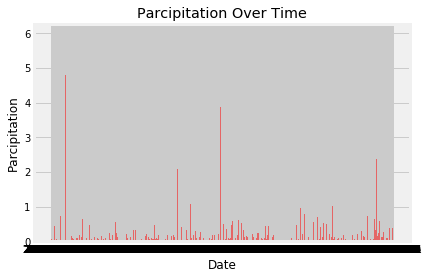

In [44]:
plt.bar(date_range_array, prcp_mean_list, color='r', alpha=0.5, align="center")
plt.title("Parcipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Parcipitation")

In [45]:
df_data = {
    "Date":date_range_array,
    "PRCP":prcp_mean_list
}
df = pd.DataFrame(df_data).set_index('Date')

stat_summery = df.PRCP.describe()
stat_summery

count    2275.000000
mean        0.169862
std         0.365672
min         0.000000
25%         0.011429
50%         0.061429
75%         0.182857
max         5.970000
Name: PRCP, dtype: float64

In [46]:
df_data

{'Date': ['2010-10-10',
  '2010-10-11',
  '2010-10-12',
  '2010-10-13',
  '2010-10-14',
  '2010-10-15',
  '2010-10-16',
  '2010-10-17',
  '2010-10-18',
  '2010-10-19',
  '2010-10-20',
  '2010-10-21',
  '2010-10-22',
  '2010-10-23',
  '2010-10-24',
  '2010-10-25',
  '2010-10-26',
  '2010-10-27',
  '2010-10-28',
  '2010-10-29',
  '2010-10-30',
  '2010-10-31',
  '2010-11-01',
  '2010-11-02',
  '2010-11-03',
  '2010-11-04',
  '2010-11-05',
  '2010-11-06',
  '2010-11-07',
  '2010-11-08',
  '2010-11-09',
  '2010-11-10',
  '2010-11-11',
  '2010-11-12',
  '2010-11-13',
  '2010-11-14',
  '2010-11-15',
  '2010-11-16',
  '2010-11-17',
  '2010-11-18',
  '2010-11-19',
  '2010-11-20',
  '2010-11-21',
  '2010-11-22',
  '2010-11-23',
  '2010-11-24',
  '2010-11-25',
  '2010-11-26',
  '2010-11-27',
  '2010-11-28',
  '2010-11-29',
  '2010-11-30',
  '2010-12-01',
  '2010-12-02',
  '2010-12-03',
  '2010-12-04',
  '2010-12-05',
  '2010-12-06',
  '2010-12-07',
  '2010-12-08',
  '2010-12-09',
  '2010-12-10',


In [47]:
df.head()

,PRCP
Date,
2010-10-10,0.017143
2010-10-11,0.074286
2010-10-12,0.063750
2010-10-13,0.017500
2010-10-14,0.005714


In [48]:
station_count = engine.execute('SELECT station ,COUNT(*)  FROM measurement GROUP BY station order by count(*) desc').fetchall()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
station_count[0][1]

2772

In [50]:
print("Station "+station_count[0][0]+" has the most observations, they have "+str(station_count[0][1])+" observations")

Station USC00519281 has the most observations, they have 2772 observations


In [51]:
len(temp_array[0])
temp_mean_list = []

for a in list(range(0,len(date_range_array))):
    ct = 0
    ct2 = 0
    for b in list(range(0,len(temp_array[a]))):
        try:
            ct = ct + temp_array[a][b][0]
        except:
            ct2 = ct2 + 1
    try:    
        temp_mean_list.append(ct/(len(temp_array[a])-ct2))
    except:
        print("error 2")
        temp_mean_list.append("null")

len(temp_mean_list)

2275

In [52]:
min(temp_mean_list)

59.285714285714285

In [53]:
max(temp_mean_list)

81.25

In [54]:
sum(temp_mean_list)/len(temp_mean_list)

73.18921472178612

In [55]:
df1 = pd.DataFrame(engine.execute('SELECT tobs FROM measurement where station = "'+station_count[0][0]+'"').fetchall())

In [56]:
df2 = pd.DataFrame(engine.execute('SELECT station,  tobs,COUNT(*) FROM measurement GROUP BY station order by count(*) desc').fetchall(),columns = ["station","Temp","Count"])

In [57]:
df2.head(15)

,station,Temp,Count
0,USC00519281,70.0,2772
1,USC00519397,65.0,2724
2,USC00513117,67.0,2709
3,USC00519523,75.0,2669
4,USC00516128,73.0,2612
5,USC00514830,67.0,2202
6,USC00511918,66.0,1979
7,USC00517948,75.0,1372
8,USC00518838,72.0,511


In [58]:
df2.Temp

0    70.0
1    65.0
2    67.0
3    75.0
4    73.0
5    67.0
6    66.0
7    75.0
8    72.0
Name: Temp, dtype: float64

Text(0, 0.5, 'Frequency')

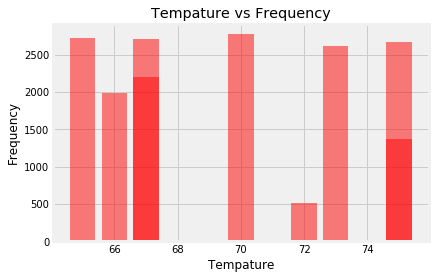

In [59]:
plt.bar(df2.Temp, df2.Count, color='r', alpha=0.5, align="center")
plt.title("Tempature vs Frequency")
plt.xlabel("Tempature")
plt.ylabel("Frequency")

In [60]:
empty_dictionary = {}
for x in list(range(0,len(prcp_mean_list))):
    empty_dictionary.update( {date_range_array[x] : prcp_mean_list[x]} )

In [61]:
empty_dictionary

{'2010-10-10': 0.017142857142857144,
 '2010-10-11': 0.07428571428571429,
 '2010-10-12': 0.06375,
 '2010-10-13': 0.0175,
 '2010-10-14': 0.005714285714285714,
 '2010-10-15': 0.00125,
 '2010-10-16': 0.013333333333333334,
 '2010-10-17': 0.07166666666666667,
 '2010-10-18': 0.015000000000000001,
 '2010-10-19': 0.53625,
 '2010-10-20': 0.0,
 '2010-10-21': 0.395,
 '2010-10-22': 0.17124999999999999,
 '2010-10-23': 0.002857142857142857,
 '2010-10-24': 0.0,
 '2010-10-25': 0.0,
 '2010-10-26': 0.2755555555555556,
 '2010-10-27': 0.20777777777777778,
 '2010-10-28': 0.17333333333333334,
 '2010-10-29': 0.09000000000000001,
 '2010-10-30': 0.3985714285714286,
 '2010-10-31': 0.060000000000000005,
 '2010-11-01': 0.43571428571428567,
 '2010-11-02': 0.09571428571428571,
 '2010-11-03': 0.2842857142857143,
 '2010-11-04': 0.8912500000000001,
 '2010-11-05': 0.38666666666666666,
 '2010-11-06': 0.8257142857142856,
 '2010-11-07': 0.19571428571428573,
 '2010-11-08': 0.00125,
 '2010-11-09': 0.005,
 '2010-11-10': 0.137

In [62]:
engine.execute("select station from station").fetchall()[0][0]

'USC00519397'

In [63]:
len(engine.execute("select station from station").fetchall())

9

In [65]:
temp_dict = {}
for x in list(range(0,len(engine.execute("select station from station").fetchall()))):
    temp_dict.update({x:engine.execute("select station from station").fetchall()[x][0]})

In [66]:
temp_dict

{0: 'USC00519397',
 1: 'USC00513117',
 2: 'USC00514830',
 3: 'USC00517948',
 4: 'USC00518838',
 5: 'USC00519523',
 6: 'USC00519281',
 7: 'USC00511918',
 8: 'USC00516128'}

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
